In [1]:
#!pip install geopandas contextily folium

Anzahl der Zonen: 263
Spalten: ['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry']


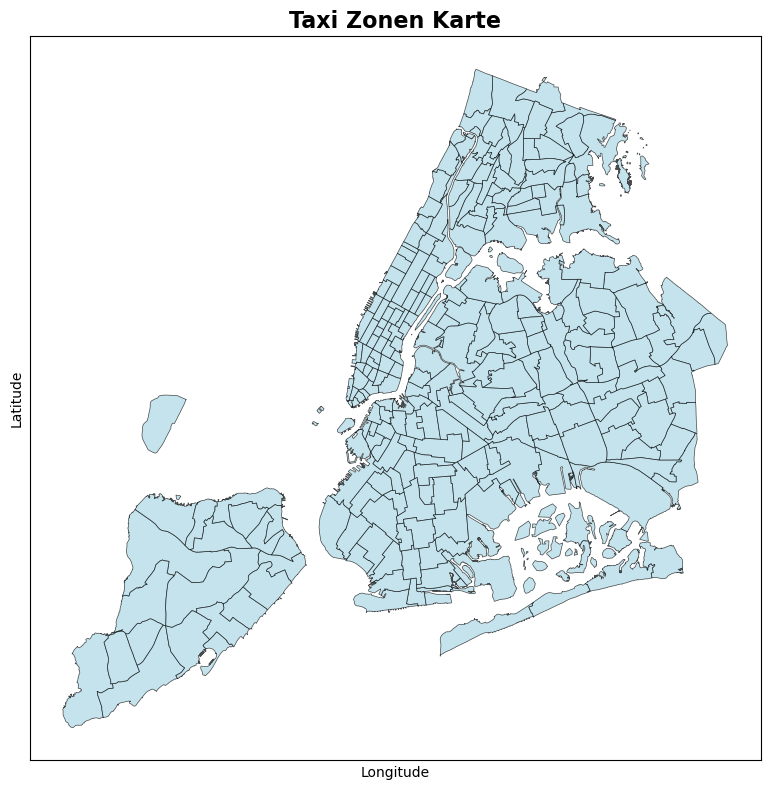


Erweiterte Karte mit Satelliten-Hintergrund:


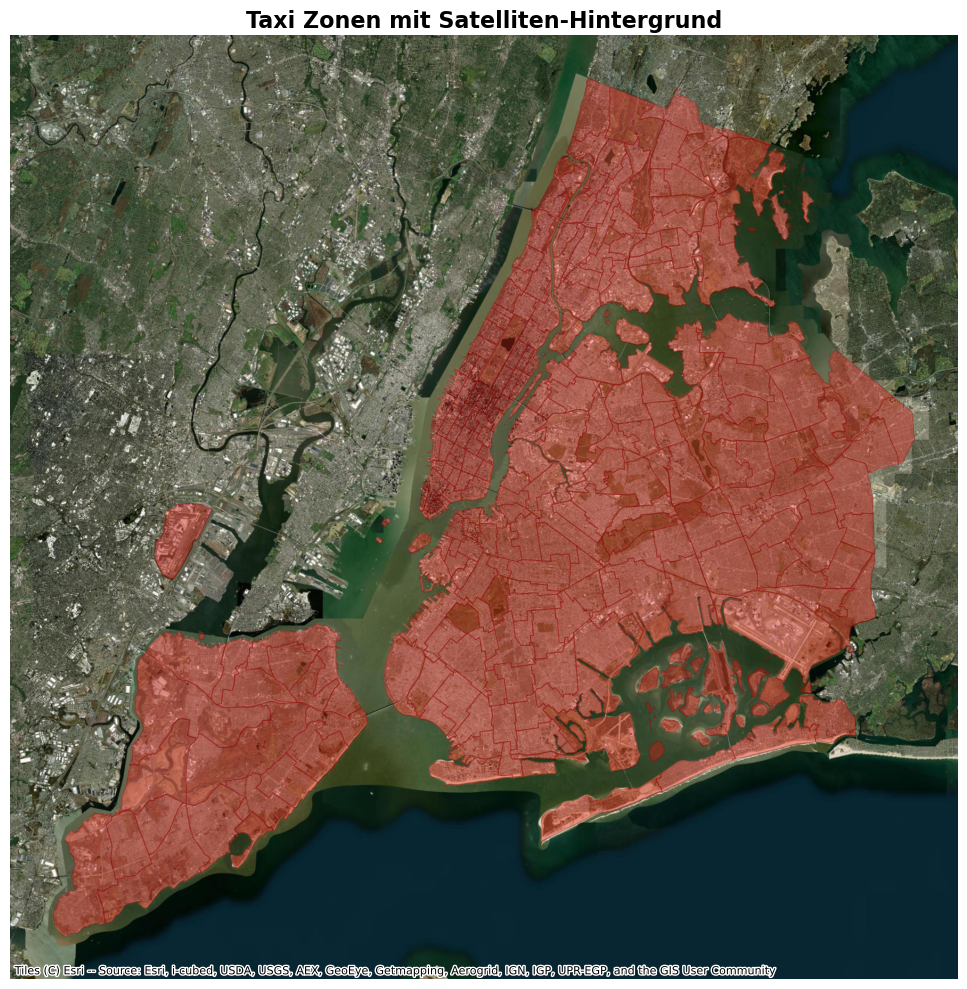

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.colors import ListedColormap
import numpy as np

gdf = gpd.read_file('./mapdata/taxi_zones.shp')

print("Anzahl der Zonen:", len(gdf))
print("Spalten:", gdf.columns.tolist())

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

gdf.plot(ax=ax, 
         color='lightblue', 
         edgecolor='black', 
         linewidth=0.5,
         alpha=0.7)

ax.set_title('Taxi Zonen Karte', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("Erweiterte Karte mit Satelliten-Hintergrund:")

gdf_web = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

gdf_web.plot(ax=ax,
             color='red',
             alpha=0.3,
             edgecolor='darkred',
             linewidth=0.8)

ctx.add_basemap(ax, 
                crs=gdf_web.crs, 
                source=ctx.providers.Esri.WorldImagery,
                zoom=12)
                
ax.set_title('Taxi Zonen mit Satelliten-Hintergrund', 
             fontsize=16, fontweight='bold')
ax.set_axis_off() 

plt.tight_layout()
plt.show()

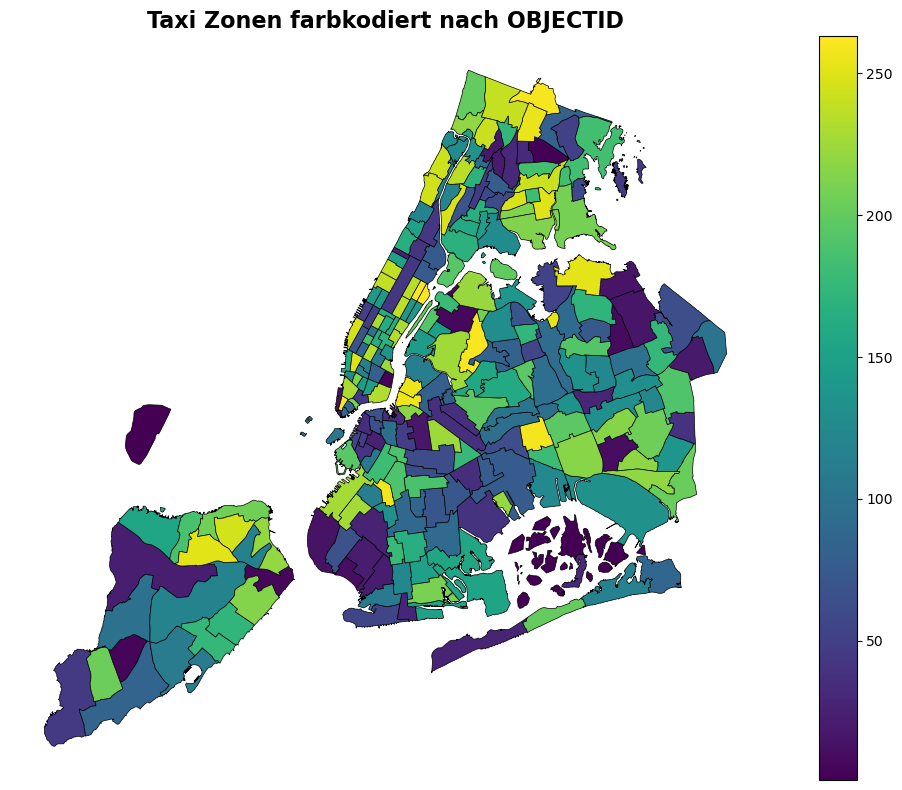

In [3]:
import folium

center_lat = gdf.geometry.centroid.y.mean()
center_lon = gdf.geometry.centroid.x.mean()

m = folium.Map(location=[center_lat, center_lon], 
                zoom_start=10,
                tiles='OpenStreetMap')

folium.GeoJson(
    gdf,
    style_function=lambda feature: {
        'fillColor': 'blue',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.3,
    },
    popup=folium.GeoJsonPopup(fields=['zone_name'] if 'zone_name' in gdf.columns else []),
    tooltip=folium.GeoJsonTooltip(fields=['zone_name'] if 'zone_name' in gdf.columns else [])
).add_to(m)

m.save('taxi_zones_map.html')

if any('id' in col.lower() for col in gdf.columns):
    id_col = [col for col in gdf.columns if 'id' in col.lower()][0]
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    gdf.plot(ax=ax,
             column=id_col,
             cmap='viridis',
             legend=True,
             edgecolor='black',
             linewidth=0.5)
    
    ax.set_title(f'Taxi Zonen farbkodiert nach {id_col}', 
                 fontsize=16, fontweight='bold')
    ax.set_axis_off()
    
    plt.tight_layout()
    plt.show()